The problem
When considering a new job, these are the common questions to ask:

- What's the job title?
- Where is this job located?
- Can I work remotely?
- What experience level is this?
- How big is this company?

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read Data

df = pd.read_csv('ds_salaries.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [3]:
# Size Data
df.shape

(3755, 11)

In [4]:
# Information Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


## Data Wrangling

In [5]:
# Check Missing Values

df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [6]:
# Check Data Duplicates

df.duplicated().sum()

1171

In [7]:
# Handling Data Duplicates

df.drop_duplicates(inplace=True)
print("Data Duplicates: ", df.duplicated().sum())

Data Duplicates:  0


In [8]:
# Splitting Categorical and Numerical Data
df_categorical = df.select_dtypes(include='object') 
df_numerical = df.select_dtypes(exclude='object')


In [9]:
# Categorical Data
df_categorical.head()

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
0,SE,FT,Principal Data Scientist,EUR,ES,ES,L
1,MI,CT,ML Engineer,USD,US,US,S
2,MI,CT,ML Engineer,USD,US,US,S
3,SE,FT,Data Scientist,USD,CA,CA,M
4,SE,FT,Data Scientist,USD,CA,CA,M


In [10]:
# Numerical Data
df_numerical.head()

,work_year,salary,salary_in_usd,remote_ratio
0,2023,80000,85847,100
1,2023,30000,30000,100
2,2023,25500,25500,100
3,2023,175000,175000,100
4,2023,120000,120000,100


In [11]:
# Check Unique Value in each CategorIcal Data
def unique_value(df):
   for col in df.columns:
     print(f"Column {col}:")
     print(df[col].value_counts())

In [12]:
# Data Numerical
unique_value(df_numerical)

Column work_year:
work_year
2023    1156
2022    1125
2021     228
2020      75
Name: count, dtype: int64
Column salary:
salary
100000    70
120000    59
150000    58
200000    48
80000     46
          ..
126277     1
153088     1
323300     1
200160     1
412000     1
Name: count, Length: 815, dtype: int64
Column salary_in_usd:
salary_in_usd
100000    58
150000    56
120000    51
200000    47
130000    39
          ..
314100     1
195800     1
262500     1
209450     1
94665      1
Name: count, Length: 1035, dtype: int64
Column remote_ratio:
remote_ratio
100    1211
0      1186
50      187
Name: count, dtype: int64


In [13]:
# Data Categorical
unique_value(df_categorical)

Column experience_level:
experience_level
SE    1554
MI     664
EN     270
EX      96
Name: count, dtype: int64
Column employment_type:
employment_type
FT    2547
PT      17
CT      10
FL      10
Name: count, dtype: int64
Column job_title:
job_title
Data Engineer                598
Data Scientist               538
Data Analyst                 396
Machine Learning Engineer    206
Analytics Engineer            91
                            ... 
Compliance Data Analyst        1
Deep Learning Researcher       1
Staff Data Analyst             1
Data DevOps Engineer           1
Finance Data Analyst           1
Name: count, Length: 93, dtype: int64
Column salary_currency:
salary_currency
USD    2107
EUR     200
GBP     144
INR      59
CAD      25
AUD       9
SGD       6
BRL       6
PLN       5
CHF       4
HUF       3
DKK       3
JPY       3
TRY       3
THB       2
ILS       1
HKD       1
CZK       1
MXN       1
CLP       1
Name: count, dtype: int64
Column employee_residence:
employee_residen

In [14]:
# Check Column job title
df['job_title'].unique()

array(['Principal Data Scientist', 'ML Engineer', 'Data Scientist',
       'Applied Scientist', 'Data Analyst', 'Data Modeler',
       'Research Engineer', 'Analytics Engineer',
       'Business Intelligence Engineer', 'Machine Learning Engineer',
       'Data Strategist', 'Data Engineer', 'Computer Vision Engineer',
       'Data Quality Analyst', 'Compliance Data Analyst',
       'Data Architect', 'Applied Machine Learning Engineer',
       'AI Developer', 'Research Scientist', 'Data Analytics Manager',
       'Business Data Analyst', 'Applied Data Scientist',
       'Staff Data Analyst', 'ETL Engineer', 'Data DevOps Engineer',
       'Head of Data', 'Data Science Manager', 'Data Manager',
       'Machine Learning Researcher', 'Big Data Engineer',
       'Data Specialist', 'Lead Data Analyst', 'BI Data Engineer',
       'Director of Data Science', 'Machine Learning Scientist',
       'MLOps Engineer', 'AI Scientist', 'Autonomous Vehicle Technician',
       'Applied Machine Learning Sc

In [15]:
# Categorization of the data
def categorize_title(title):
    if 'Analyst' in title or "Data Lead" in title:
        return 'Data Analyst'
    elif 'Scientist' in title or "Science" in title or "Researcher" in title:
        return 'Data Scientist'
    elif 'Engineer' in title or 'Architect' in title or 'Developer' in title or "Programmer" in title:
        return 'Data Engineer'
    else:
        return 'Other'

# Apply categorization function to create a new column
df['job_type'] = df['job_title'].apply(categorize_title)
df['job_type'].unique()

array(['Data Scientist', 'Data Engineer', 'Data Analyst', 'Other'],
      dtype=object)

In [16]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_type
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L,Data Scientist
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S,Data Engineer
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S,Data Engineer
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M,Data Scientist
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M,Data Scientist


### Exploratory Data Analysis

In [17]:
# what is the average salary based on work type
average_salary = df.groupby('job_type')['salary_in_usd'].mean().sort_values(ascending=False)

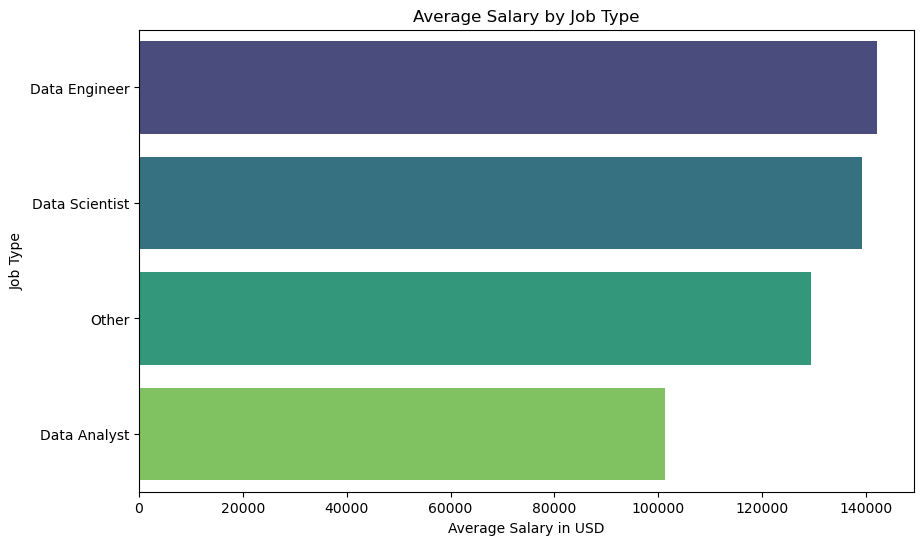

In [20]:
average_salary_df = average_salary.reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='salary_in_usd', y='job_type', data=average_salary_df, palette='viridis')

# Adding titles and labels
plt.title('Average Salary by Job Type')
plt.xlabel('Average Salary in USD')
plt.ylabel('Job Type')

# Show the plot
plt.show()